# Exploratory Data Analysis And Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import skew

In [4]:
data = pd.read_csv("customer_churn_data.csv")

In [5]:
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


We see that we have attributes with the object data type, and the 'InternetService' variable contains missing values.

In [7]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


#### Null Value Handling

In [8]:
def analysis_null_value(data):
    total_nulls = data.isnull().sum()
    percentage_of_nulls = (total_nulls / len(data)) * 100
    df_null_values = pd.DataFrame({"Total Null Count": total_nulls,
                                  "Percentage": percentage_of_nulls})
    return df_null_values

In [9]:
df_nulls = analysis_null_value(data)

In [10]:
df_nulls.T

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
Total Null Count,0.0,0.0,0.0,0.0,0.0,0.0,297.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,29.7,0.0,0.0,0.0


In [11]:
data["InternetService"] = data["InternetService"].fillna("Unkown")

In [12]:
df_nulls = analysis_null_value(data)
df_nulls.T

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
Total Null Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Unkown,2208.32,No,Yes


#### Duplicated Data Handling

In [15]:
data.duplicated().sum()

0

In [16]:
from matplotlib.colors import LinearSegmentedColormap
#### COLORS ####
background = "#E8EAF6"
color1 = "#7986cb" # lavender-ish
color1_shadow = "#6c7bc6"
text_color_dark = "#0e1225"
color2 = "#ffc266" # peach-color-ish
color2_shadow = "#ffb84d"
color3 = "#ce93d8"
color3_shadow = "#cc8fd6" # mauve-ish / pink-ish

custom_cmap = LinearSegmentedColormap.from_list("pastel_palette", [color1, color2, color3])

#### Correlation HeatMap

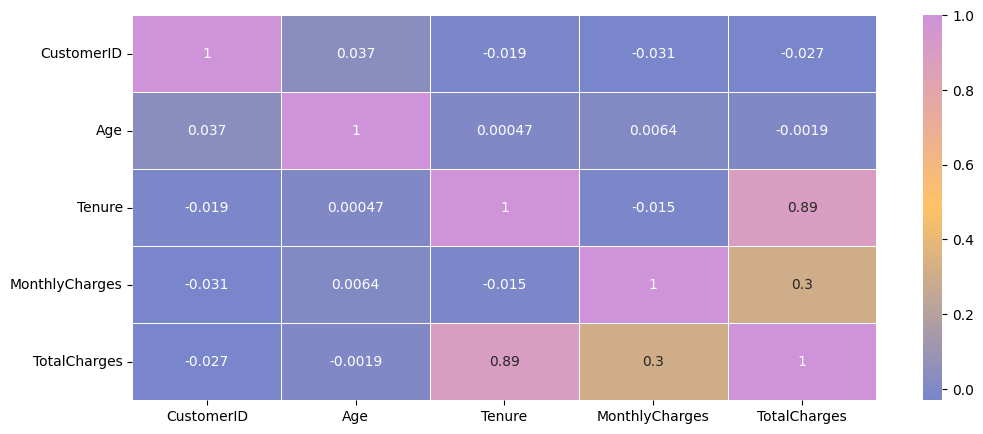

In [17]:
corr_matrix = data.select_dtypes(include= "number").corr()

plt.figure(figsize = (12,5))
sns.heatmap(corr_matrix, annot = True, cmap = custom_cmap, linecolor = "white", linewidths = 0.5)
plt.show()

#### Analysis And Pattern Detection

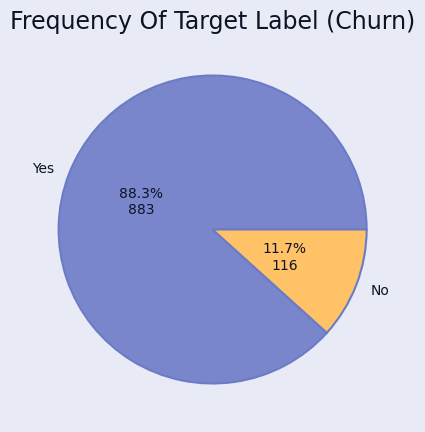

In [18]:
frequency_label = data["Churn"].value_counts().reset_index().rename(columns = {"count": "Count"})

plt.figure(figsize = (12,5), facecolor = background)
plt.pie(frequency_label["Count"], labels = frequency_label["Churn"], autopct = lambda p: f'{p:.1f}%\n{int(p * sum(frequency_label["Count"]) / 100)}', 
        pctdistance = .5, textprops = {"color": text_color_dark}, colors = [color1, color2], wedgeprops = {"linewidth": 1.5, "edgecolor": color1_shadow})
plt.title("Frequency Of Target Label (Churn)", fontsize = 17, color = text_color_dark)
plt.show()

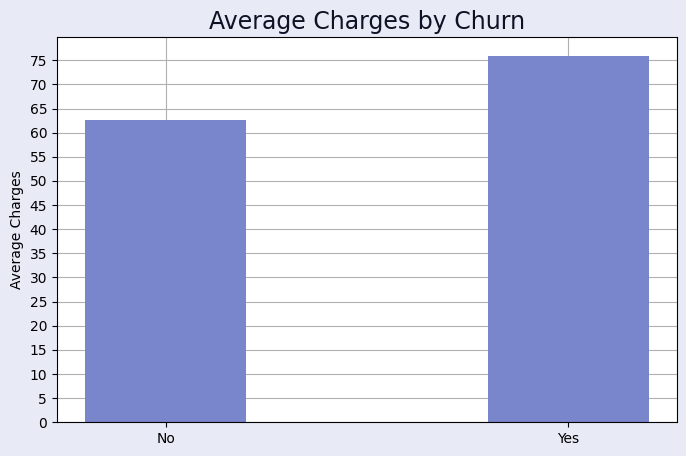

In [19]:
average_charges_by_churn = data.groupby(by = "Churn")["MonthlyCharges"].mean().reset_index().rename(columns = {"MonthlyCharges":"Monthly Charges"})

plt.figure(figsize = (8,5), facecolor = background)
plt.bar(average_charges_by_churn["Churn"], average_charges_by_churn["Monthly Charges"], color = color1, width = .4)
plt.ylabel("Average Charges")
plt.yticks(np.arange(0, average_charges_by_churn["Monthly Charges"].max() +1,5))
plt.grid()
plt.gca().set_axisbelow(True)
plt.title("Average Charges by Churn", fontsize = 17, color = text_color_dark)
plt.show()

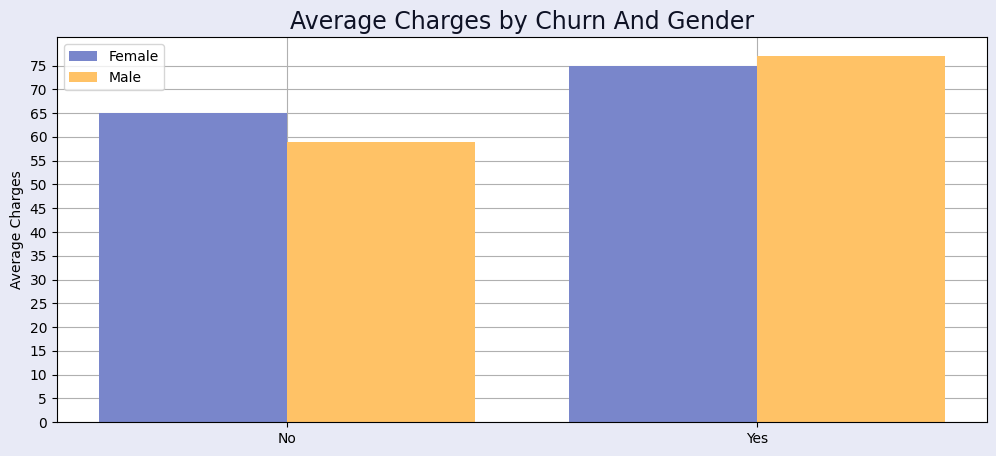

In [20]:
average_churn_and_gender = data.groupby(by = ["Churn","Gender"])["MonthlyCharges"].mean().reset_index().rename(columns = {"MonthlyCharges":"Monthly Charges"})

female = average_churn_and_gender[average_churn_and_gender["Gender"] == "Female"]
male = average_churn_and_gender[average_churn_and_gender["Gender"] == "Male"]
index = np.arange(len(female["Churn"]))
col_width = 0.4

plt.figure(figsize = (12,5), facecolor = background)
plt.bar(index, female["Monthly Charges"], color = color1, width = col_width)
plt.bar(index+ col_width, male["Monthly Charges"], color = color2, width = col_width)
plt.ylabel("Average Charges")
plt.yticks(np.arange(0, average_charges_by_churn["Monthly Charges"].max() +1,5))
plt.xticks(index + (col_width/2), female["Churn"])
plt.grid()
plt.gca().set_axisbelow(True)
plt.title("Average Charges by Churn And Gender", fontsize = 17, color = text_color_dark)
plt.legend(["Female","Male"])
plt.show()



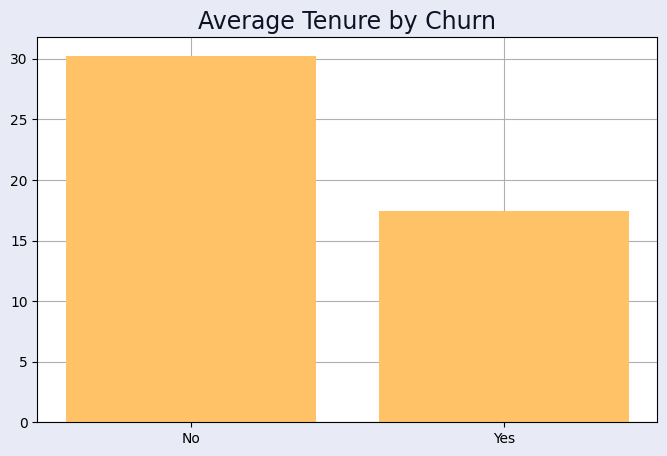

In [21]:
tenure = data.groupby("Churn")["Tenure"].mean().reset_index()

plt.figure(figsize = (8,5), facecolor = background)
plt.bar(tenure["Churn"], tenure["Tenure"], color = color2)
plt.title("Average Tenure by Churn", fontsize = 17, color = text_color_dark)
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

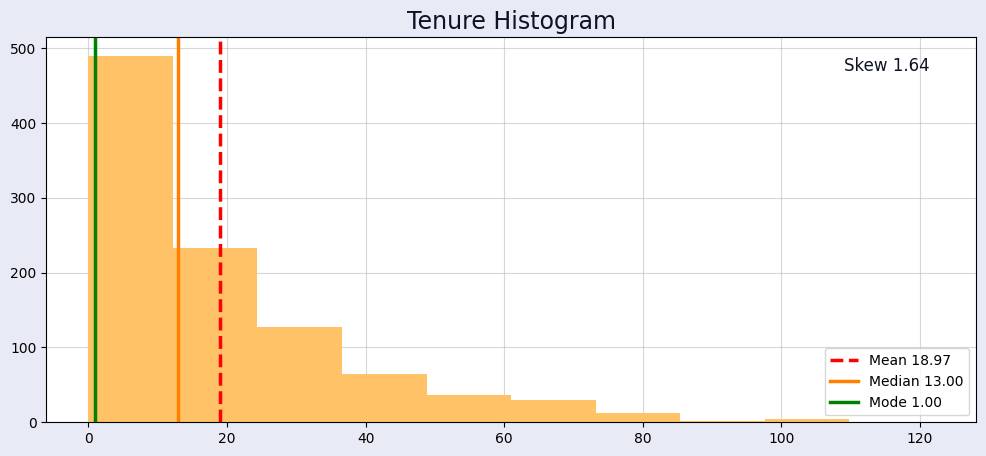

In [22]:
tenure_median = data["Tenure"].median()
tenure_mode = data["Tenure"].mode()[0]
tenure_mean = data["Tenure"].mean()
tenure_skew = skew(data["Tenure"])


plt.figure(figsize = (12,5), facecolor = background)
plt.hist(data["Tenure"], color = color2)
plt.axvline(tenure_mean, color = "red", linestyle = "--", linewidth = 2.5, label = f'Mean {tenure_mean:.2f}')
plt.axvline(tenure_median, color = "#ff8000", linestyle = "-", linewidth = 2.5, label = f'Median {tenure_median:.2f}')
plt.axvline(tenure_mode, color = "green", linestyle= "-", linewidth = 2.5, label = f'Mode {tenure_mode:.2f}')
plt.text(.95,.95, f'Skew {tenure_skew:.2f}', fontsize = 12, color = text_color_dark, ha = "right", va = "top",  transform = plt.gca().transAxes)

plt.title("Tenure Histogram", fontsize = 17, color = text_color_dark)
plt.grid(alpha = .5)
plt.gca().set_axisbelow(True)
plt.legend()
plt.show()


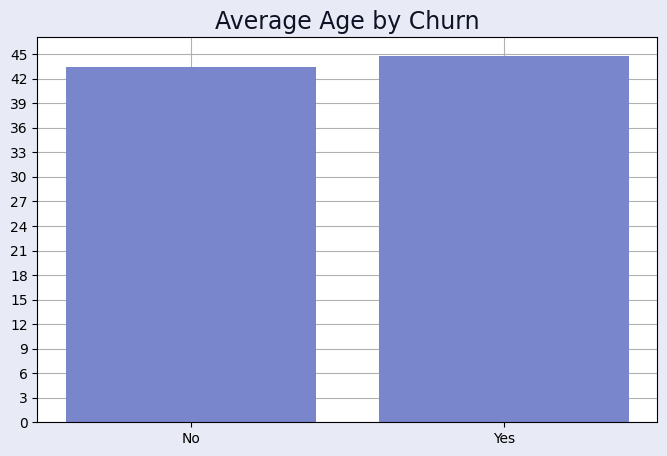

In [23]:
age = data.groupby("Churn")["Age"].mean().reset_index()

plt.figure(figsize = (8,5), facecolor = background)
plt.bar(age["Churn"], age["Age"], color = color1)
plt.title("Average Age by Churn", fontsize = 17, color = text_color_dark)
plt.yticks(np.arange(0,age["Age"].max()+1, 3))
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

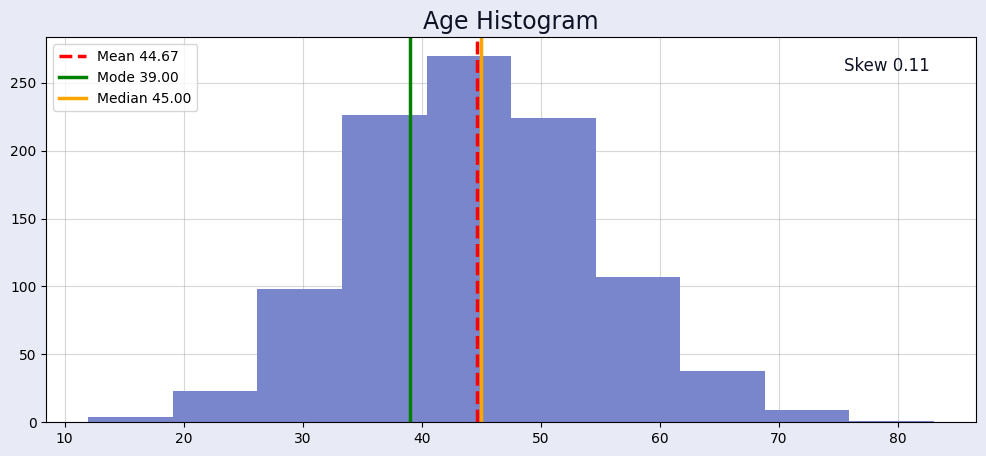

In [24]:
age_mean = data["Age"].mean()
age_mode = data["Age"].mode()[0]
age_median = data["Age"].median()
age_skew = skew(data["Age"])

plt.figure(figsize = (12,5), facecolor = background)
plt.hist(data["Age"], color = color1)

plt.axvline(age_mean, color = "red", linestyle = "--", linewidth = 2.5, label = f'Mean {age_mean:.2f}')
plt.axvline(age_mode, color = "green", linestyle = "-", linewidth = 2.5, label = f'Mode {age_mode:.2f}')
plt.axvline(age_median, color = "orange", linestyle = "-", linewidth = 2.5, label = f'Median {age_median:.2f}')
plt.text(.95,.95, f'Skew {age_skew:.2f}', fontsize = 12, color = text_color_dark, ha = "right", va = "top", transform = plt.gca().transAxes)

plt.title("Age Histogram", fontsize = 17, color = text_color_dark)

plt.grid(alpha = .5)
plt.gca().set_axisbelow(True)
plt.legend()
plt.show()

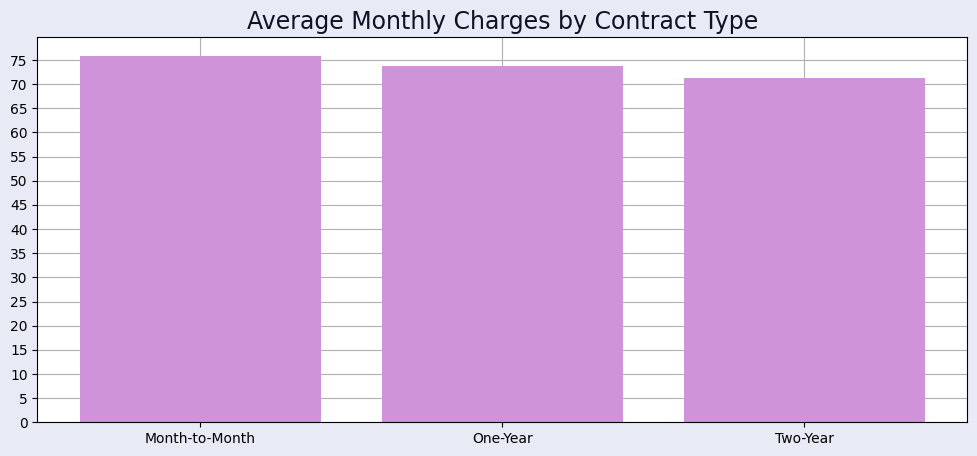

In [25]:
contract = data.groupby("ContractType")["MonthlyCharges"].mean().reset_index().rename( columns = {"ContractType": "Contract Type", "MonthlyCharges": "Monthly Charges"})

plt.figure(figsize = (12,5), facecolor = background)
plt.bar(contract["Contract Type"], contract["Monthly Charges"], color = color3)

plt.yticks(np.arange(0, contract["Monthly Charges"].max()+1,5))
plt.xticks(rotation = 0)

plt.title("Average Monthly Charges by Contract Type", fontsize = 17, color = text_color_dark)
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

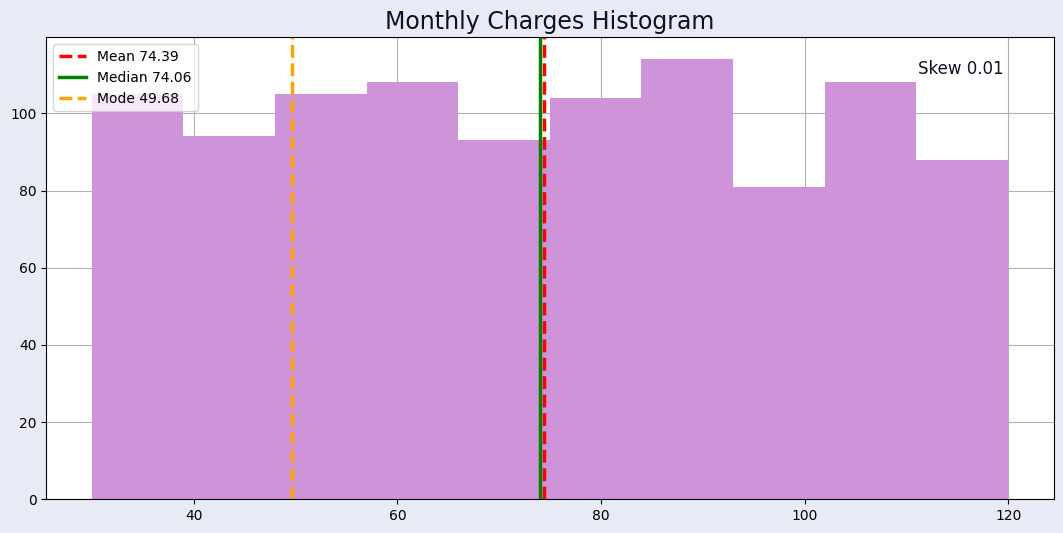

In [26]:
charges_median = data["MonthlyCharges"].median()
charges_mode = data["MonthlyCharges"].mode()[0]
charges_mean = data["MonthlyCharges"].mean()
charges_skew = skew(data["MonthlyCharges"])

plt.figure(figsize = (13,6), facecolor = background)
plt.hist(data["MonthlyCharges"], color = color3)
plt.axvline(charges_mean, color = "red", linestyle = "--", linewidth = 2.5, label = f'Mean {charges_mean:.2f}')
plt.axvline(charges_median, color = "green", linestyle = "-", linewidth = 2.5, label = f'Median {charges_median:.2f}')
plt.axvline(charges_mode, color = "orange", linestyle = "--", linewidth = 2.5, label = f'Mode {charges_mode:.2f}')
plt.text(.95, .95, f'Skew {charges_skew:.2f}', fontsize = 12, color = text_color_dark, ha = "right", va = "top", transform = plt.gca().transAxes)

plt.title("Monthly Charges Histogram", fontsize = 17, color = text_color_dark)

plt.grid(.5)
plt.gca().set_axisbelow("True")
plt.legend()
plt.show()

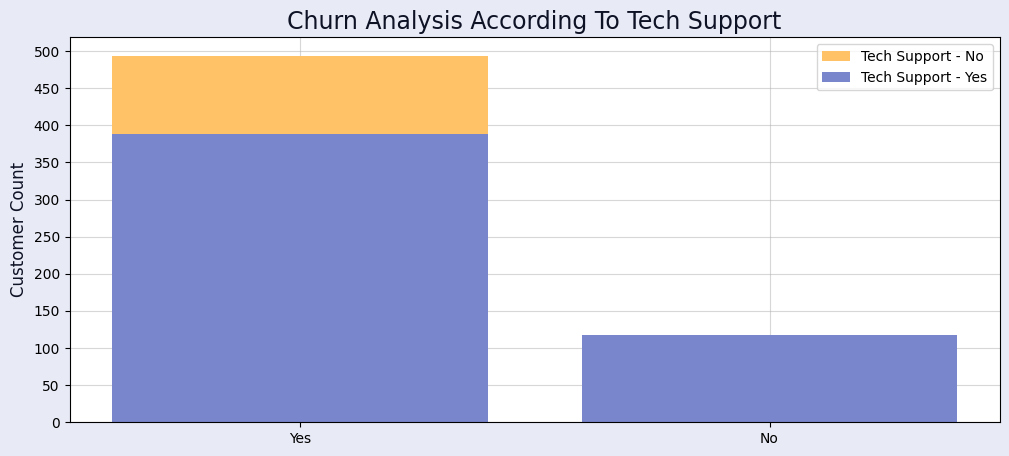

In [27]:
support = data.groupby(["Churn","TechSupport"]).size().reset_index().rename(columns = {0:"Count"})

yes = support[support["TechSupport"] == "Yes"]
no = support[support["TechSupport"] == "No"]

plt.figure(figsize = (12,5), facecolor = background)
plt.bar(no["Churn"], no["Count"], color = color2)
plt.bar(yes["Churn"], yes["Count"], color = color1)
plt.title("Churn Analysis According To Tech Support", fontsize = 17, color = text_color_dark)
plt.ylabel("Customer Count", fontsize = 12, color = text_color_dark)

plt.yticks(np.arange(0,no["Count"].max() + 10, 50))

plt.grid(alpha = .5)
plt.gca().set_axisbelow(True)
plt.legend(["Tech Support - No","Tech Support - Yes"])
plt.show()


# Preprocessing

#### Outlier Handling

In [28]:
def detect_outliers_iqr(dataframe):
    outlier_info = {}
    for column in dataframe.select_dtypes(include=['number']).columns:
        Q1 = dataframe[column].quantile(0.25) 
        Q3 = dataframe[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR  

        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_ratio = outlier_count / len(dataframe) * 100
        
        outlier_info[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_count,
            'Outlier Ratio (%)': outlier_ratio
        }
    
    return pd.DataFrame(outlier_info).T

    

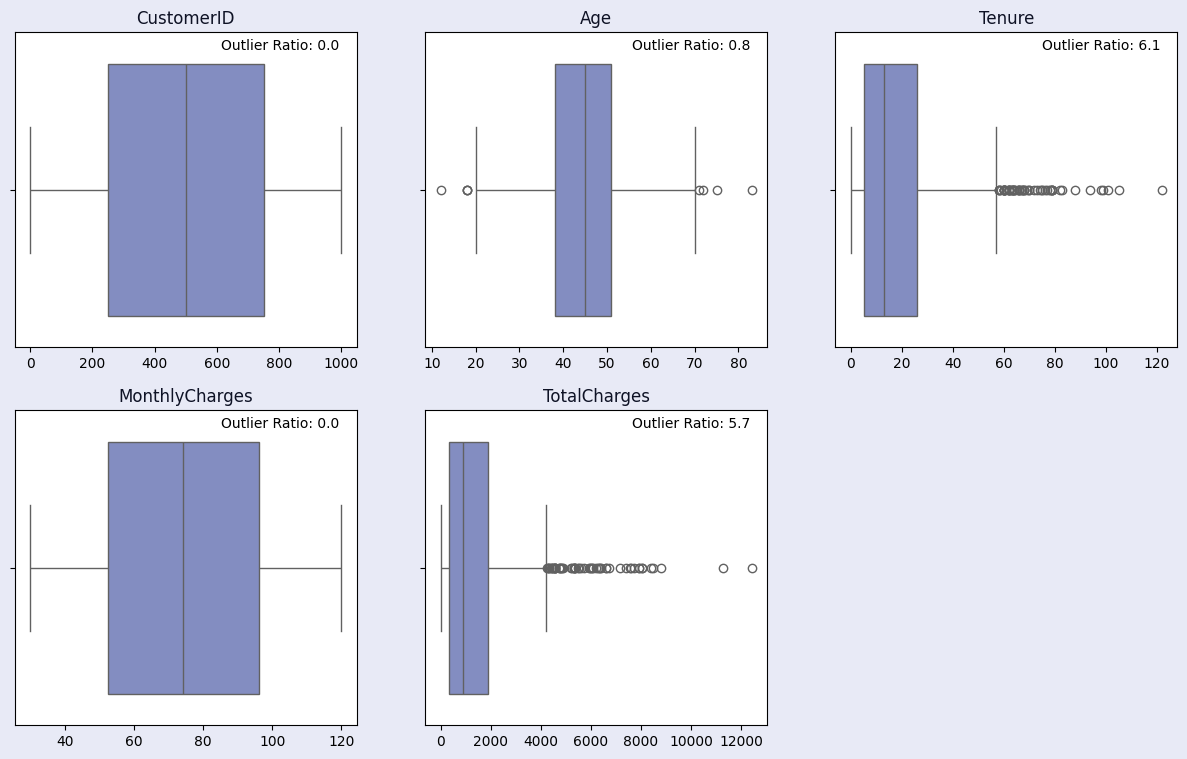

In [29]:
def plot_boxplots(dataframe):
    
    numeric_columns = dataframe.select_dtypes(include=["number"]).columns
    num_cols = len(numeric_columns)
    outliers_info = detect_outliers_iqr(dataframe)
    
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 9))
    axes = axes.flatten()  
    
    
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe, x=column, ax=axes[i], color=color1)
        axes[i].set_title(column, fontsize=12, color = text_color_dark)
        axes[i].set_xlabel('')
        axes[i].text(0.95, 0.98, f'Outlier Ratio: {outliers_info.loc[column]["Outlier Ratio (%)"]}', horizontalalignment = "right",
     verticalalignment = "top", transform = axes[i].transAxes)
    
   
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.set_facecolor(background)
    plt.show()


plot_boxplots(data)


We observe that the 'Tenure' attribute contains some outliers; however, since it represents the number of months a user has benefited from the service, I am not processing these outliers, as it is likely to have long-term loyal customers.

#### Convert Categorical Data Into Numerical Data

In [30]:
data_numerical = pd.get_dummies(data.drop(columns = ["CustomerID","Churn","TotalCharges"], axis = 1), dtype = int)
target = data["Churn"].map({"Yes": 1, "No":0})

In [31]:
analysis_null_value(data_numerical).T

,Age,Tenure,MonthlyCharges,Gender_Female,Gender_Male,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_Unkown,TechSupport_No,TechSupport_Yes
Total Null Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Test And Train Split Of Data

In [32]:
from sklearn.model_selection import train_test_split

X = data_numerical
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 50, shuffle = True)

#### Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

#### Class Imbalance Handling
In the class distribution, the weight is on the 'Yes' class, while the 'No' class is the minority. In this case, we use RandomOverSampler to generate examples from the existing ones to balance the classes. Our goal here is to prevent the model from making biased predictions by favoring one class due to class imbalance.

In [34]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = oversampler.fit_resample(X_train_scaled, y_train)


In [38]:
from collections import Counter

# Orijinal dataset
print("The class distribution in the original dataset:")
print(Counter(y_train))

# Balanced dataset
print("\nThe class distribution in the dataset after RandomOverSampler:")
print(Counter(y_train_res))


The class distribution in the original dataset:
Counter({1: 178, 0: 22})

The class distribution in the dataset after RandomOverSampler:
Counter({1: 178, 0: 178})


# Classification

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost modeli
xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = .05, random_state=42)

# Hiperparametre aralığı
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1, 3, 5],
    'reg_lambda': [1, 3, 5],
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_res, y_train_res)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("The best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        95
           1       0.98      1.00      0.99       705

    accuracy                           0.98       800
   macro avg       0.99      0.94      0.96       800
weighted avg       0.99      0.98      0.98       800


Confusion Matrix:
[[ 83  12]
 [  0 705]]

Accuracy: 0.9850
The best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}
